In [1]:
#importing all required libraries

import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher


In [2]:
#Function to read resumes from the folder one by one
mypath='C:/Users/User/OneDrive/Documents/Saved_Resumes' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [3]:
def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

#function to read resume ends

In [4]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords.
    keyword_dict = pd.read_csv('C:/Users/User/OneDrive/Documents/words_csv.csv',encoding='latin-1')
    stats_words = [nlp(text) for text in keyword_dict['statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
    Other_Langs = [nlp(text) for text in keyword_dict['Other Langs'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    matcher.add('Others', None, *Other_Langs)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends
        
# code to execute/call the above functions

final_database = pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)


ROBERT
 SMITH
Principal Data Scientist
Phone: (0123)-456-789
 |
 Email: info@qwikresume.com
 | 
Website:
 Qwikresume.com
  
SUMMARY
Decades of experience with 18 publications involving data mining, statistics, machine 
learning/predictive analytics, image processing, and time-frequency domain signal processing of 
time-series signals. An experienced programmer A creative thinker with earnest curiosity and 
eagerness to learn new skills US citizen.
CORE COMPETENCIES
Decades of experience in data mining, statistics, machine.
PROFESSIONAL EXPERIENCE
Principal Data Scientist
BOTTLENOSE - March 2013 ± 2019
Key Deliverables:
Real-Time Trend Detection First non-founder employee.
Developed and established the Intelligent Playground of Bottlenose from the ground up.
This platform proved to be a central player in raising over $15 million in funding.
Used weighted SVM on top of signal processing techniques to find trends in social-media 
before competitors.
Found breaking-news significantly soone

   Candidate Name Subject              Keyword Count
0            ally      ML                 svm      1
0      amansharma  Python              python      1
1      amansharma       R                   r      1
0         brandon   Stats  statistical models      1
0        chandler  Python              python      1
1        chandler       R                   r      1
2        chandler      DL               keras      1
3        chandler     NLP                nltk      2
4        chandler      ML                 svm      1
5        chandler      ML   linear regression      1
6        chandler      DL      face detection      1
7        chandler      DL              opencv      1
8        chandler      DL                cuda      1
9        chandler     NLP                 nlp      2
10       chandler     NLP               spacy      1
JonathanWhitmore
PhD,DataScientist
MountainView,CA
+1650-943-3715
B
JBWhit@gmail.com
Í
JonathanWhitmore.com
JBWhit
JonathanBWhitmore
Experience
2014-
Pr

   Candidate Name Subject              Keyword Count
0            ally      ML                 svm      1
0      amansharma  Python              python      1
1      amansharma       R                   r      1
0         brandon   Stats  statistical models      1
0        chandler  Python              python      1
1        chandler       R                   r      1
2        chandler      DL               keras      1
3        chandler     NLP                nltk      2
4        chandler      ML                 svm      1
5        chandler      ML   linear regression      1
6        chandler      DL      face detection      1
7        chandler      DL              opencv      1
8        chandler      DL                cuda      1
9        chandler     NLP                 nlp      2
10       chandler     NLP               spacy      1
0        jonathan  Python              pandas      1
1        jonathan  Python          matplotlib      1
2        jonathan  Python               numpy 

    Candidate Name Subject              Keyword Count
0             ally      ML                 svm      1
0       amansharma  Python              python      1
1       amansharma       R                   r      1
0          brandon   Stats  statistical models      1
0         chandler  Python              python      1
1         chandler       R                   r      1
2         chandler      DL               keras      1
3         chandler     NLP                nltk      2
4         chandler      ML                 svm      1
5         chandler      ML   linear regression      1
6         chandler      DL      face detection      1
7         chandler      DL              opencv      1
8         chandler      DL                cuda      1
9         chandler     NLP                 nlp      2
10        chandler     NLP               spacy      1
0         jonathan  Python              pandas      1
1         jonathan  Python          matplotlib      1
2         jonathan  Python  

In [5]:
# #Code to count words under each category and visualize it through MAtplotlib
# final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
# final_db2.reset_index(inplace = True)
# final_db2.fillna(0,inplace=True)
# candidate_data = final_db2.iloc[:,1:]
# candidate_data.index = final_db2['Candidate Name']
# #the candidate profile in a csv format
# cand=candidate_data.to_csv('candidate_profile.csv')
# cand_profile=pd.read_csv('candidate_profile.csv')
# cand_profile

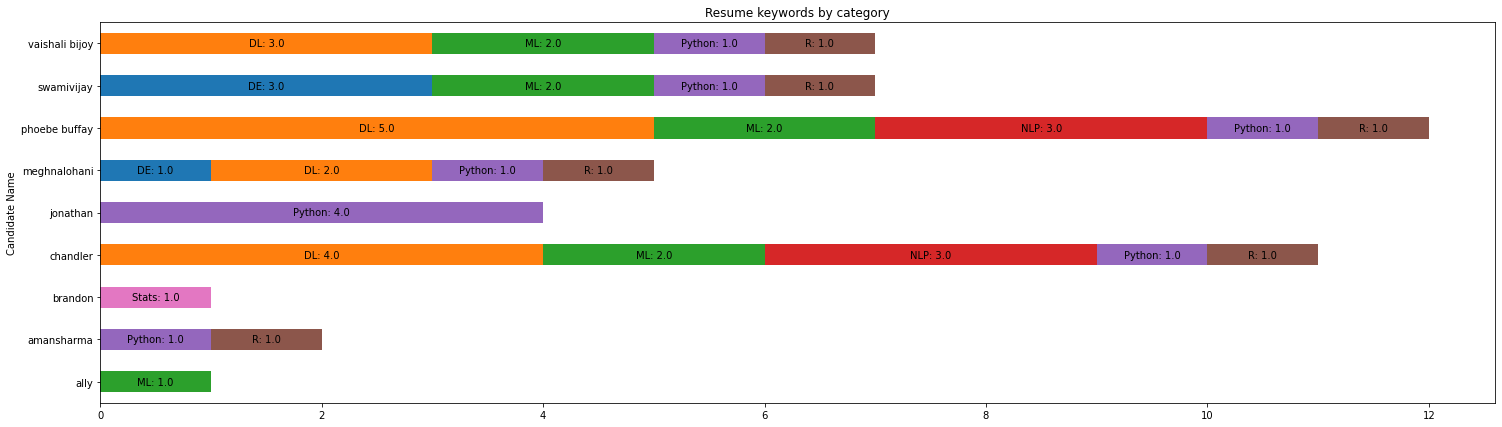

In [6]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], 
                                                     final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
sample2=new_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

In [7]:
cand_profile

,Candidate Name,DE,DL,ML,NLP,Python,R,Stats
0,ally,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,amansharma,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,brandon,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chandler,0.0,4.0,2.0,3.0,1.0,1.0,0.0
4,jonathan,0.0,0.0,0.0,0.0,4.0,0.0,0.0
5,meghnalohani,1.0,2.0,0.0,0.0,1.0,1.0,0.0
6,phoebe buffay,0.0,5.0,2.0,3.0,1.0,1.0,0.0
7,swamivijay,3.0,0.0,2.0,0.0,1.0,1.0,0.0
8,vaishali bijoy,0.0,3.0,2.0,0.0,1.0,1.0,0.0
